# QC NSW vs OSW

## Introduction

Analysis on QC NSW vs OSW 

## Config

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys

sys.path.append('c:/Users/Jordi Cremades/Documents/Repos/central-node')

from utils import query_engines

## Distribution of NSW vs OSW customers

In [64]:
q = query_engines.QueryEngines(reset_query_logs=True, reset_to_load=False)

START_DATE = "'2023-01-01'"
END_DATE = "'2024-07-01'"

params = [
    # dates
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
]

q.prepare_query('nsw_osw_deep_dive/distribution_nsw_vs_osw.sql', params=params)

df  = q.query_run_starburst( #query_run_livedb otherwise
    output_file='customer_variant_distribution',
    load_from_output_file=None,
    print_query=True
)

df.head()

c:\Users/Jordi Cremades/Documents/Repos/central-node\utils\query_engines.py:235: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/b7c2cd19470ce0031d5a0c9d1dd4a15a3debfdcdc2bb52b1248cffe4a40179d2


,p_creation_date,variant,n_customers
0,2023-01-01,not_found_variant,248239
1,2023-01-02,not_found_variant,224866
2,2023-01-03,not_found_variant,206640
3,2023-01-04,not_found_variant,205338
4,2023-01-05,not_found_variant,221157


In [67]:
df = df[df['variant'].isin(['Variant 1', 'Control Group'])]

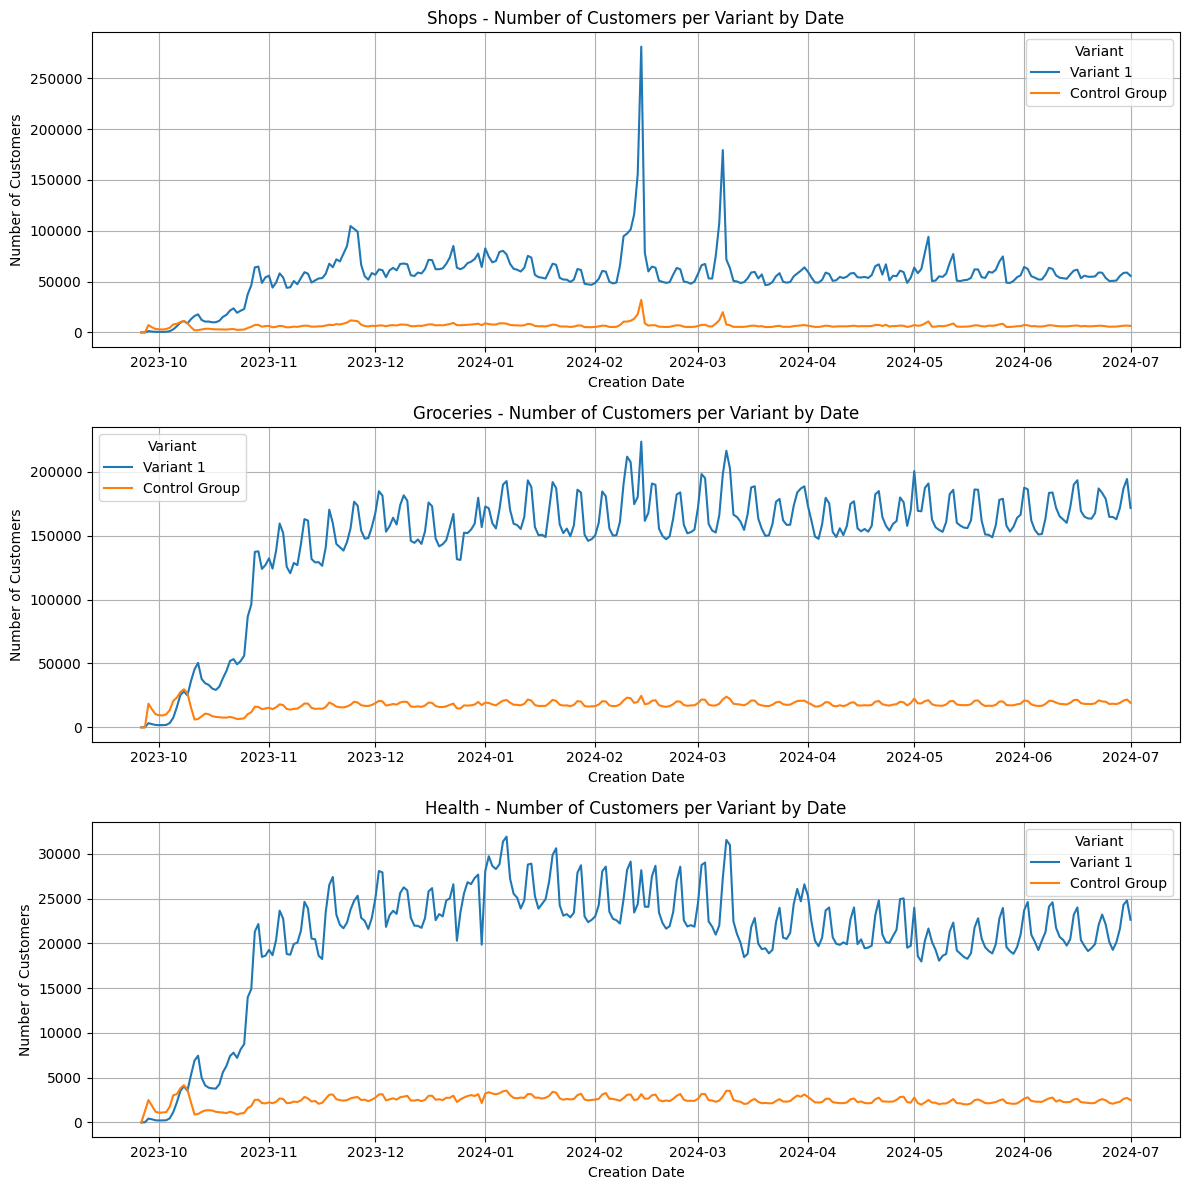

In [57]:
palette = {
    'Variant 1': sns.color_palette()[0],
    'Control Group': sns.color_palette()[1]
}

df = df[df['variant'].isin(['Variant 1', 'Control Group'])]

# Convert date column to datetime
df['p_creation_date'] = pd.to_datetime(df['p_creation_date'])

# Plot for each category tag
categories = df['category_tag'].unique()

fig, axes = plt.subplots(len(categories), 1, figsize=(12, 4 * len(categories)))

for ax, category in zip(axes, categories):
    sns.lineplot(data=df[df['category_tag'] == category], x='p_creation_date', y='n_customers', hue='variant', ax=ax, markers=True, dashes=False, palette=palette,)
    ax.set_title(f'{category} - Number of Customers per Variant by Date')
    ax.set_ylabel('Number of Customers')
    ax.set_xlabel('Creation Date')
    ax.legend(title='Variant')
    ax.grid(True)

plt.tight_layout()
plt.show()

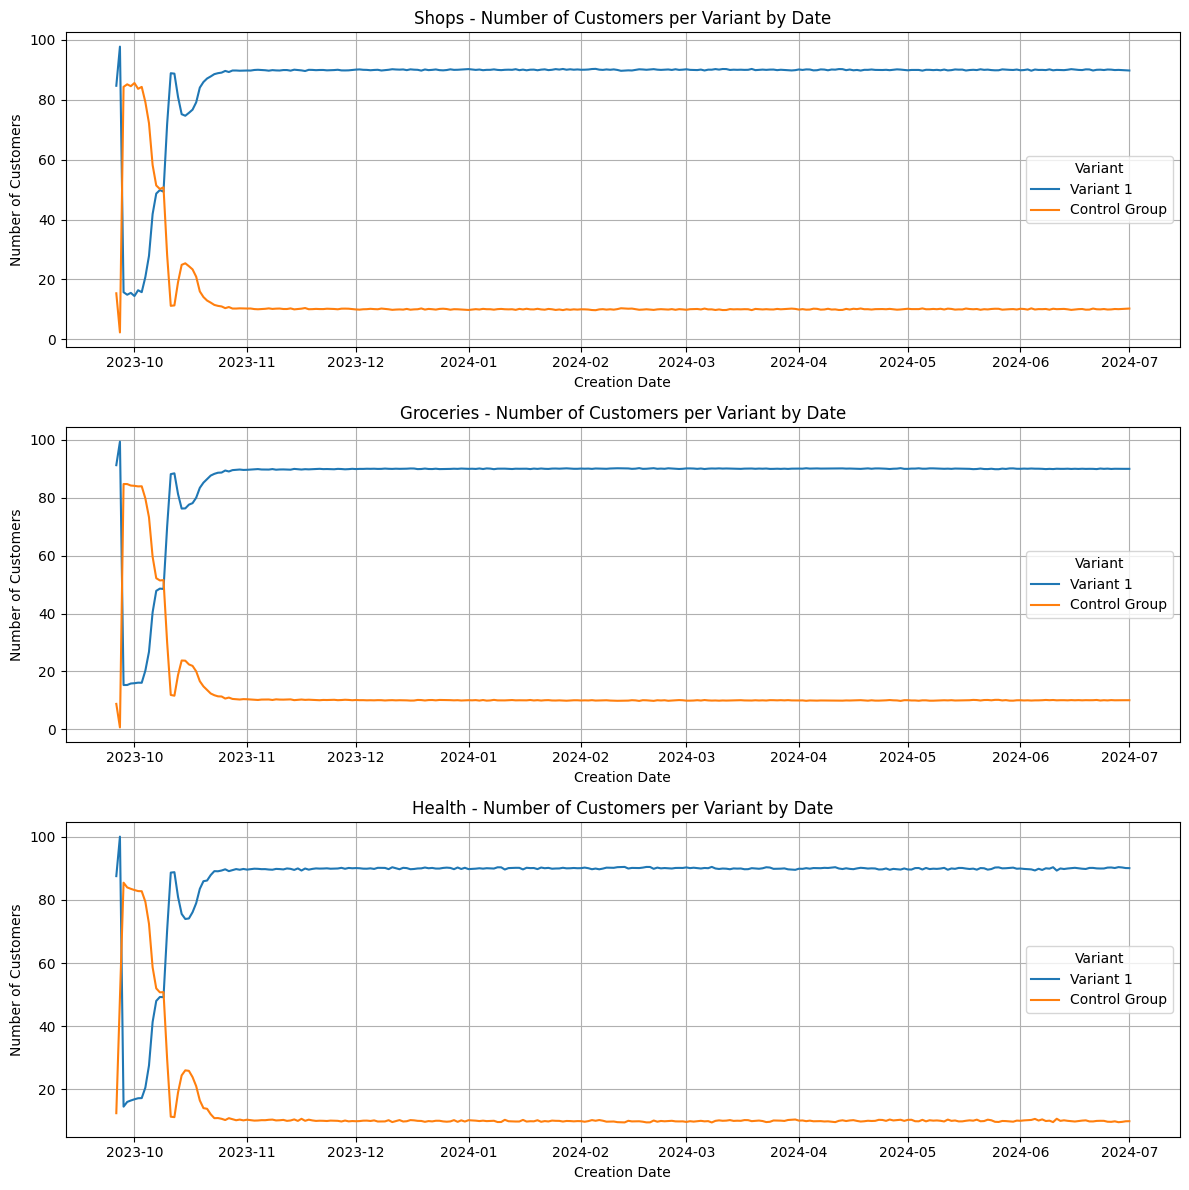

In [59]:
palette = {
    'Variant 1': sns.color_palette()[0],
    'Control Group': sns.color_palette()[1]
}

df = df[df['variant'].isin(['Variant 1', 'Control Group'])]

# Convert date column to datetime
df['p_creation_date'] = pd.to_datetime(df['p_creation_date'])

# Calculate total customers per date and category
df['total_customers'] = df.groupby(['p_creation_date', 'category_tag'])['n_customers'].transform('sum')

# Calculate the percentage of customers for each variant
df['percent_customers'] = (df['n_customers'] / df['total_customers']) * 100


# Plot for each category tag
categories = df['category_tag'].unique()

fig, axes = plt.subplots(len(categories), 1, figsize=(12, 4 * len(categories)))

for ax, category in zip(axes, categories):
    sns.lineplot(data=df[df['category_tag'] == category], x='p_creation_date', y='percent_customers', hue='variant', ax=ax, markers=True, dashes=False, palette=palette,)
    ax.set_title(f'{category} - Number of Customers per Variant by Date')
    ax.set_ylabel('Number of Customers')
    ax.set_xlabel('Creation Date')
    ax.legend(title='Variant')
    ax.grid(True)

plt.tight_layout()
plt.show()